<a href="https://colab.research.google.com/github/mammadmaheri7/AcharFaranceProject/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading tensorflow and keras and other appropriate libraries:

In [0]:
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

Loading Fashion MNIST dataset from keras datasets and separate test and train datas:

In [0]:
(train_images, train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

Define the class names of the dataset labels:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Ploting the first 20 images along with their labels:

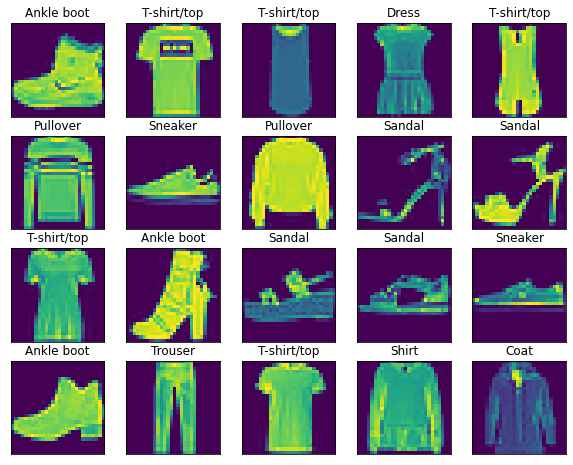

In [7]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[(train_labels[i])])
    plt.xticks([])
    plt.yticks([])
plt.show()

Printing the shape of the train and test images:

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Plot an image figure of the train images for better illustration:

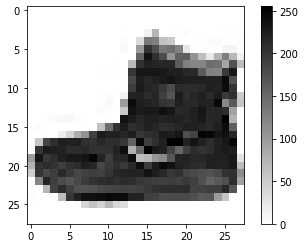

In [13]:
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

The original matrix of an image in out dataset:

In [15]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
train_images[0].min()

0

Scaling the images of the dataset to a range of 0 to 1:






In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

Chacking it again:

In [18]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Reshaping the images:

In [0]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

Importing appropriate tools for modeling our neural network:

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

Modeling a convulotional neural network:

In [25]:
model = Sequential()
model.add(Conv2D(32,(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Compile the model:

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Early stopping callback:

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

Training the model by fitting it to the train data:

In [31]:
history = model.fit(train_images,train_labels,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4304 - accuracy: 0.8448 - val_loss: 0.3291 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2820 - accuracy: 0.8968 - val_loss: 0.2797 - val_accuracy: 0.9041
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2377 - accuracy: 0.9134 - val_loss: 0.2563 - val_accuracy: 0.9091
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2046 - accuracy: 0.9232 - val_loss: 0.2366 - val_accuracy: 0.9145
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1769 - accuracy: 0.9336 - val_loss: 0.2295 - val_accuracy: 0.9182
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1537 - accuracy: 0.9427 - val_loss: 0.2490 - val_accuracy: 0.9148
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1325 - accuracy: 0.9496 - val_loss: 0.2533 - val_ac

In [33]:
history = model.fit(train_images,train_labels,epochs=20,validation_split=0.2,callbacks=early_stop)

Epoch 1/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0243 - accuracy: 0.9913 - val_loss: 0.6202 - val_accuracy: 0.9119
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0252 - accuracy: 0.9908 - val_loss: 0.5984 - val_accuracy: 0.9142
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.6126 - val_accuracy: 0.9144
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.6761 - val_accuracy: 0.9137


Evaluate the model with the test data:

In [34]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6784 - accuracy: 0.9149


Loss plot:

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Accuracy plot:

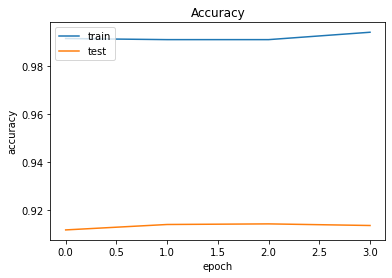

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()